Data Preprocessing

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science_Public/gold_standard_generation'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
significant_genes_report_corrected.csv	TCGA_dataset


In [2]:
!pip install sparse_lmm

In [3]:
import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA_dataset/TGCA_Kidney_Papillary_Cell_Carcinoma_(KIRP)/TCGA.KIRP.sampleMap_KIRP_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA_dataset/TGCA_Kidney_Papillary_Cell_Carcinoma_(KIRP)/TCGA.KIRP.sampleMap_HiSeqV2_PANCAN', sep='\t', index_col=0)

In [4]:
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,additional_surgery_locoregional_procedure,additional_surgery_metastatic_procedure,age_at_initial_pathologic_diagnosis,...,_GENOMIC_ID_TCGA_KIRP_exp_HiSeqV2_PANCAN,_GENOMIC_ID_TCGA_KIRP_gistic2thd,_GENOMIC_ID_TCGA_KIRP_PDMRNAseq,_GENOMIC_ID_data/public/TCGA/KIRP/miRNA_HiSeq_gene,_GENOMIC_ID_data/public/TCGA/KIRP/miRNA_GA_gene,_GENOMIC_ID_TCGA_KIRP_PDMarray,_GENOMIC_ID_TCGA_KIRP_G4502A_07_3,_GENOMIC_ID_TCGA_KIRP_gistic2,_GENOMIC_ID_TCGA_KIRP_mutation_ucsc_maf_gene,_GENOMIC_ID_TCGA_KIRP_exp_HiSeqV2_exon
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2K-A9WE-01,TCGA-2K-A9WE-01,TCGA-2K-A9WE,TCGA Kidney Papillary Cell Carcinoma (KIRP),kidney papillary cell carcinoma,Kidney,NaN,NaN,NaN,NaN,53.0,...,e5c5e3a7-7cca-4c65-b10d-17cc2a2a0291,TCGA-2K-A9WE-01A-11D-A381-01,TCGA-2K-A9WE-01,TCGA-2K-A9WE-01,NaN,NaN,NaN,TCGA-2K-A9WE-01A-11D-A381-01,NaN,e5c5e3a7-7cca-4c65-b10d-17cc2a2a0291
TCGA-2Z-A9J1-01,TCGA-2Z-A9J1-01,TCGA-2Z-A9J1,TCGA Kidney Papillary Cell Carcinoma (KIRP),kidney papillary cell carcinoma,Kidney,NaN,NaN,NaN,NaN,71.0,...,76894c83-5e3a-4d7c-b3e9-f7ef57e724a8,TCGA-2Z-A9J1-01A-11D-A381-01,TCGA-2Z-A9J1-01,TCGA-2Z-A9J1-01,NaN,NaN,NaN,TCGA-2Z-A9J1-01A-11D-A381-01,NaN,76894c83-5e3a-4d7c-b3e9-f7ef57e724a8
TCGA-2Z-A9J2-01,TCGA-2Z-A9J2-01,TCGA-2Z-A9J2,TCGA Kidney Papillary Cell Carcinoma (KIRP),kidney papillary cell carcinoma,Kidney,NaN,NaN,NaN,NaN,71.0,...,59d6c567-d73c-4572-ae55-385b9f0ed8bf,TCGA-2Z-A9J2-01A-11D-A381-01,TCGA-2Z-A9J2-01,TCGA-2Z-A9J2-01,NaN,NaN,NaN,TCGA-2Z-A9J2-01A-11D-A381-01,NaN,59d6c567-d73c-4572-ae55-385b9f0ed8bf
TCGA-2Z-A9J3-01,TCGA-2Z-A9J3-01,TCGA-2Z-A9J3,TCGA Kidney Papillary Cell Carcinoma (KIRP),kidney papillary cell carcinoma,Kidney,NaN,NaN,NaN,NaN,67.0,...,86e691fc-c29d-402d-a393-8930a4f3fad9,TCGA-2Z-A9J3-01A-12D-A381-01,TCGA-2Z-A9J3-01,TCGA-2Z-A9J3-01,NaN,NaN,NaN,TCGA-2Z-A9J3-01A-12D-A381-01,NaN,86e691fc-c29d-402d-a393-8930a4f3fad9
TCGA-2Z-A9J5-01,TCGA-2Z-A9J5-01,TCGA-2Z-A9J5,TCGA Kidney Papillary Cell Carcinoma (KIRP),kidney papillary cell carcinoma,Kidney,NaN,NaN,NaN,NaN,80.0,...,9ce93e24-974d-4a90-82b7-9efdf3c61085,TCGA-2Z-A9J5-01A-21D-A381-01,TCGA-2Z-A9J5-01,TCGA-2Z-A9J5-01,NaN,NaN,NaN,TCGA-2Z-A9J5-01A-21D-A381-01,NaN,9ce93e24-974d-4a90-82b7-9efdf3c61085


In [5]:
gene_data.head()


,TCGA-B1-A657-01,TCGA-A4-A5Y1-01,TCGA-Q2-A5QZ-01,TCGA-A4-8312-01,TCGA-UZ-A9PX-01,TCGA-A4-8311-01,TCGA-GL-A9DD-01,TCGA-F9-A4JJ-01,TCGA-IA-A83V-01,TCGA-SX-A7SO-01,...,TCGA-HE-A5NI-01,TCGA-DZ-6134-11,TCGA-BQ-7044-11,TCGA-B9-4115-01,TCGA-HE-A5NF-01,TCGA-UZ-A9PV-01,TCGA-SX-A7SS-01,TCGA-IA-A40Y-01,TCGA-BQ-7061-11,TCGA-UZ-A9PP-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,0.717808,0.737708,-0.506192,2.025708,1.149208,0.929908,1.008508,-0.154792,1.040608,0.428208,...,0.866108,1.252908,1.314808,0.194008,1.137608,0.968308,0.823308,0.740108,0.528108,0.664208
HIF3A,-2.611426,5.076074,1.423374,-1.984826,-1.188526,-0.824126,-2.429026,-3.737426,-0.566426,0.055574,...,-0.230526,0.682074,1.671174,-0.770826,-2.934826,1.428674,-0.994326,2.960074,2.909674,-2.238326
RNF17,-0.531035,1.526165,-0.531035,-0.531035,-0.531035,0.242665,0.068465,-0.531035,0.749765,-0.531035,...,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.014335,-0.210735,-0.531035
RNF10,-0.257572,0.403528,-0.330772,0.810528,0.315628,-0.542872,0.367628,0.508828,0.091228,-0.051872,...,-0.018372,0.470628,0.408128,-0.311072,0.263028,-0.394072,0.158828,0.125728,0.155028,0.323928
RNF11,-0.106378,-0.022978,-2.871878,0.255322,0.121922,-0.300578,-0.257178,-0.507378,-0.329578,0.290522,...,-0.732778,0.559022,0.913522,0.291022,-0.644978,-0.127178,-0.680678,-0.780078,0.820422,0.175122


In [6]:
trait = 'Kidney Papillary Cell Carcinoma'
condition = 'depression'
condition_col = 'TPH2'

gene_list = gene_data.index.tolist()
# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_list)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 108 features, and the gene dataset includes 20530 genes


In [7]:
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,additional_surgery_locoregional_procedure,additional_surgery_metastatic_procedure,age_at_initial_pathologic_diagnosis,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2K-A9WE-01,TCGA-2K-A9WE-01,TCGA-2K-A9WE,TCGA Kidney Papillary Cell Carcinoma (KIRP),kidney papillary cell carcinoma,Kidney,NaN,NaN,NaN,NaN,53.0,...,-0.150778,0.613183,2.243367,1.33611,0.226223,0.484114,-1.415027,1.572405,0.879267,-0.265312
TCGA-2Z-A9J1-01,TCGA-2Z-A9J1-01,TCGA-2Z-A9J1,TCGA Kidney Papillary Cell Carcinoma (KIRP),kidney papillary cell carcinoma,Kidney,NaN,NaN,NaN,NaN,71.0,...,0.565422,2.307883,0.294467,-1.28139,0.637223,0.709314,-2.017627,2.026605,-0.408633,0.089688
TCGA-2Z-A9J2-01,TCGA-2Z-A9J2-01,TCGA-2Z-A9J2,TCGA Kidney Papillary Cell Carcinoma (KIRP),kidney papillary cell carcinoma,Kidney,NaN,NaN,NaN,NaN,71.0,...,-0.748878,0.650683,-0.094533,-1.28139,-0.826577,-0.921286,-1.702427,1.751805,-0.769733,0.178488
TCGA-2Z-A9J3-01,TCGA-2Z-A9J3-01,TCGA-2Z-A9J3,TCGA Kidney Papillary Cell Carcinoma (KIRP),kidney papillary cell carcinoma,Kidney,NaN,NaN,NaN,NaN,67.0,...,-0.303278,-1.587117,-2.384733,2.91811,0.174223,1.139214,-2.745727,2.166005,-2.483133,0.087488
TCGA-2Z-A9J5-01,TCGA-2Z-A9J5-01,TCGA-2Z-A9J5,TCGA Kidney Papillary Cell Carcinoma (KIRP),kidney papillary cell carcinoma,Kidney,NaN,NaN,NaN,NaN,80.0,...,-0.748878,1.423483,1.622367,0.46401,0.503323,1.001314,-1.287227,1.909005,0.152467,-0.238112


In [8]:
feature_cols = [condition_col] + gene_list
merged_data = merged_data[feature_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,TPH2,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2K-A9WE-01,-0.281574,0.895608,-2.059826,-0.531035,0.126528,-0.345878,1.12319,0.509706,-1.058046,-0.423399,...,-0.150778,0.613183,2.243367,1.33611,0.226223,0.484114,-1.415027,1.572405,0.879267,-0.265312
TCGA-2Z-A9J1-01,0.299126,0.899708,-2.980426,0.049665,0.552628,-0.381678,0.17029,1.180806,-1.688346,-0.423399,...,0.565422,2.307883,0.294467,-1.28139,0.637223,0.709314,-2.017627,2.026605,-0.408633,0.089688
TCGA-2Z-A9J2-01,-0.281574,0.552108,-2.707826,-0.531035,0.473928,-0.255978,0.14389,-0.407894,-1.186546,-0.423399,...,-0.748878,0.650683,-0.094533,-1.28139,-0.826577,-0.921286,-1.702427,1.751805,-0.769733,0.178488
TCGA-2Z-A9J3-01,-0.281574,0.867508,-4.064326,-0.531035,-0.493572,-0.203878,0.83559,1.648106,-2.772246,-0.423399,...,-0.303278,-1.587117,-2.384733,2.91811,0.174223,1.139214,-2.745727,2.166005,-2.483133,0.087488
TCGA-2Z-A9J5-01,-0.281574,0.783608,-1.563626,0.829965,0.357528,-0.711678,0.34799,0.500906,-1.963546,-0.423399,...,-0.748878,1.423483,1.622367,0.46401,0.503323,1.001314,-1.287227,1.909005,0.152467,-0.238112


In [9]:
def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,TPH2,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Kidney Papillary Cell Carcinoma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2K-A9WE-01,-0.281574,0.895608,-2.059826,-0.531035,0.126528,-0.345878,1.12319,0.509706,-1.058046,-0.423399,...,0.613183,2.243367,1.33611,0.226223,0.484114,-1.415027,1.572405,0.879267,-0.265312,1
TCGA-2Z-A9J1-01,0.299126,0.899708,-2.980426,0.049665,0.552628,-0.381678,0.17029,1.180806,-1.688346,-0.423399,...,2.307883,0.294467,-1.28139,0.637223,0.709314,-2.017627,2.026605,-0.408633,0.089688,1
TCGA-2Z-A9J2-01,-0.281574,0.552108,-2.707826,-0.531035,0.473928,-0.255978,0.14389,-0.407894,-1.186546,-0.423399,...,0.650683,-0.094533,-1.28139,-0.826577,-0.921286,-1.702427,1.751805,-0.769733,0.178488,1
TCGA-2Z-A9J3-01,-0.281574,0.867508,-4.064326,-0.531035,-0.493572,-0.203878,0.83559,1.648106,-2.772246,-0.423399,...,-1.587117,-2.384733,2.91811,0.174223,1.139214,-2.745727,2.166005,-2.483133,0.087488,1
TCGA-2Z-A9J5-01,-0.281574,0.783608,-1.563626,0.829965,0.357528,-0.711678,0.34799,0.500906,-1.963546,-0.423399,...,1.423483,1.622367,0.46401,0.503323,1.001314,-1.287227,1.909005,0.152467,-0.238112,1


Preliminary analysis

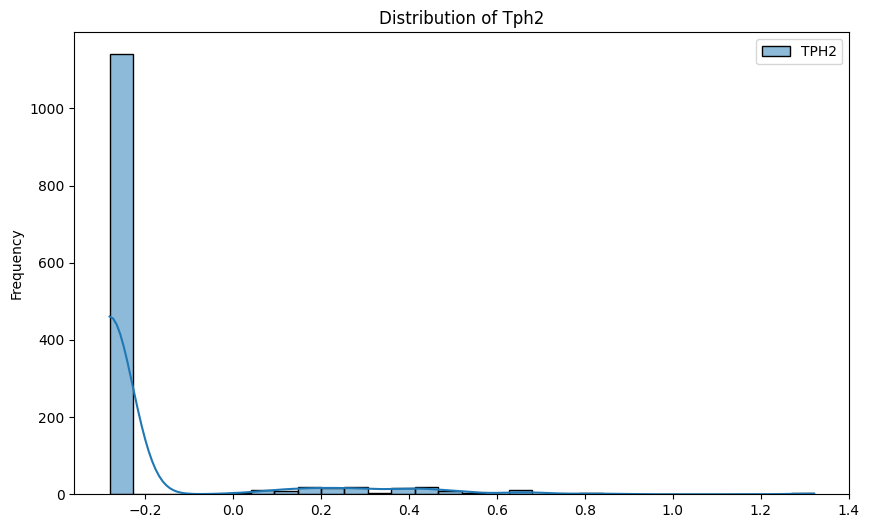

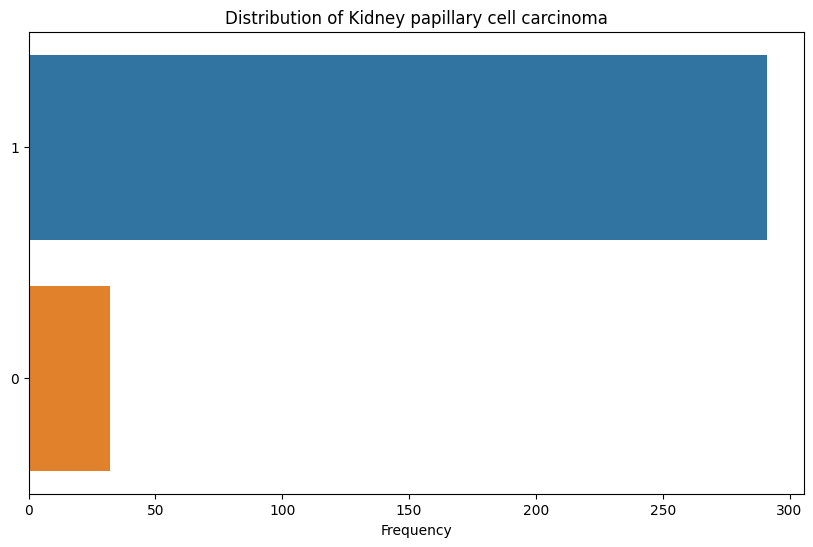

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# For example, we may want to choose a few genes we are interested in for visualization:
interested_genes = [col for col in gene_list if 'kirp' in col.lower()]
analyze_distributions(merged_data, numerical_columns=[condition_col, *interested_genes], categorical_columns=[trait])


In [11]:
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
feature_cols = merged_data.columns.tolist()[:-1]

merged_data.head()

,depression,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Kidney Papillary Cell Carcinoma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2K-A9WE-01,0,0.895608,-2.059826,-0.531035,0.126528,-0.345878,1.12319,0.509706,-1.058046,-0.423399,...,0.613183,2.243367,1.33611,0.226223,0.484114,-1.415027,1.572405,0.879267,-0.265312,1
TCGA-2Z-A9J1-01,0,0.899708,-2.980426,0.049665,0.552628,-0.381678,0.17029,1.180806,-1.688346,-0.423399,...,2.307883,0.294467,-1.28139,0.637223,0.709314,-2.017627,2.026605,-0.408633,0.089688,1
TCGA-2Z-A9J2-01,0,0.552108,-2.707826,-0.531035,0.473928,-0.255978,0.14389,-0.407894,-1.186546,-0.423399,...,0.650683,-0.094533,-1.28139,-0.826577,-0.921286,-1.702427,1.751805,-0.769733,0.178488,1
TCGA-2Z-A9J3-01,0,0.867508,-4.064326,-0.531035,-0.493572,-0.203878,0.83559,1.648106,-2.772246,-0.423399,...,-1.587117,-2.384733,2.91811,0.174223,1.139214,-2.745727,2.166005,-2.483133,0.087488,1
TCGA-2Z-A9J5-01,0,0.783608,-1.563626,0.829965,0.357528,-0.711678,0.34799,0.500906,-1.963546,-0.423399,...,1.423483,1.622367,0.46401,0.503323,1.001314,-1.287227,1.909005,0.152467,-0.238112,1


Do regression & Cross Validation

In [12]:
import pandas as pd
from sparse_lmm import VariableSelection

def preprocess_data(X_train, X_test=None):
    # Normalize training data
    mean_train = np.mean(X_train, axis=0)
    std_train = np.std(X_train, axis=0)

    X_train_normalized = (X_train - mean_train) / std_train

    # Set columns with zero std to zero for training data
    zero_std_columns_train = np.where(std_train == 0)[0]
    X_train_normalized[:, zero_std_columns_train] = 0

    if X_test is not None:
        # Normalize test data using training data's mean and std
        X_test_normalized = (X_test - mean_train) / std_train
        X_test_normalized[:, zero_std_columns_train] = 0
    else:
        X_test_normalized = None

    return X_train_normalized, X_test_normalized

In [13]:
def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)

# Select relevant columns and convert to numpy array
y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

cv_mean, cv_std = cross_validation(X, y)
print(f'The cross-validation accuracy is {(cv_mean * 100):.2f}% ± {(cv_std * 100):.2f}%')

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
<ipython-input-12-abef56c5c9ec>:17: RuntimeWarning: invalid value encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


The cross-validation accuracy is 74.95% ± 2.41%


In [14]:
var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


In [15]:
var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


Discussion

In [16]:
import pandas as pd
from statsmodels.stats.multitest import multipletests


# Create a DataFrame for the regression results
regression_df = pd.DataFrame({
    'Variable': feature_cols,
    'Coefficient': coefficients,
    'p_value': p_values
})

# Extract information about the lifestyle condition's effect
condition_effect = regression_df.iloc[0]

# Report the effect of the lifestyle condition
print(f"Effect of the condition on the target variable:")
print(f"Variable: {condition}")
print(f"Coefficient: {condition_effect['Coefficient']:.4f}")
print(f"p-value: {condition_effect['p_value']:.4g}\n")


Effect of the condition on the target variable:
Variable: depression
Coefficient: 0.0000
p-value: 1



In [17]:
threshold = 0.05
# Apply the Benjamini-Hochberg correction
rejected, corrected_p_values, _, _ = multipletests(regression_df['p_value'][1:], alpha=threshold, method='fdr_bh')

# Add the corrected p-values to the DataFrame (ignoring the first row which is the condition)
regression_df.loc[1:, 'corrected_p_value'] = corrected_p_values

# Now filter based on the corrected p-values
significant_genes = regression_df.loc[(regression_df.index > 0) & (regression_df['corrected_p_value'] < threshold)]
significant_genes_sorted = significant_genes.sort_values('corrected_p_value')

# Print and/or save your results as before
print(f"Genes with corrected p-value < {threshold}, affecting the trait {trait} conditional on the factor {condition}, sorted by corrected p-value:")
print(significant_genes_sorted[['Variable', 'Coefficient', 'corrected_p_value']].to_string(index=False))
print(f"\nFound {len(significant_genes_sorted)} significant genes with corrected p-value < {threshold}")
# Save this to a CSV file
significant_genes_sorted.to_csv('significant_genes_report_corrected.csv', index=False)

Genes with corrected p-value < 0.05, affecting the trait Kidney Papillary Cell Carcinoma conditional on the factor depression, sorted by corrected p-value:
   Variable  Coefficient  corrected_p_value
  KRTAP20-1     0.450464      4.077928e-243
   S100A7L2    -0.450464      4.077928e-243
   SNORA70C     0.450464      4.077928e-243
      TSSK2    -0.450464      4.077928e-243
    SNORD90    -0.450464      4.077928e-243
       LCN9    -0.450464      4.077928e-243
SNORD115-20    -0.450464      4.077928e-243
  LOC653545    -0.450464      4.077928e-243
    SNAR-A3     0.450464      4.077928e-243
    DEFB122     0.450464      4.077928e-243
    SNORA30     0.450464      4.077928e-243
    SNORA69    -0.450464      4.077928e-243
    SPINK14    -0.450464      4.077928e-243
     PRR20B     0.450464      4.077928e-243
     SNORD9    -0.450464      4.077928e-243
     TTTY21     0.450464      4.077928e-243
    PPIAL4B    -0.450464      4.077928e-243
      WFDC9     0.450464      4.077928e-243
     TXN